# Bibliotecas

In [14]:
# manipulação de dados
import pandas as pd
import numpy as np

# graficos
import matplotlib.pyplot as plt
import seaborn as sns

# modelo de machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score 

# import aed
import aed

# 1. Leitura dos dados

In [2]:
df = pd.read_csv('base_rh.csv')

In [3]:
df.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


# 2. Preparação dos dados

## 2.1 Valores faltantes

In [4]:
df.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

## 2.2 Valores duplicados

In [5]:
df.index.duplicated().sum()

0

## 2.3 Tipos das variáveis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


# 3 Análise Exploratória

## 3.1 Dispersão por classe

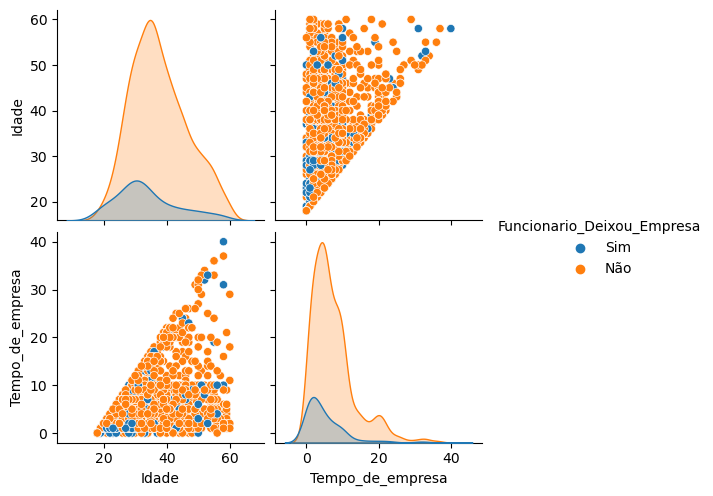

In [7]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='Funcionario_Deixou_Empresa');

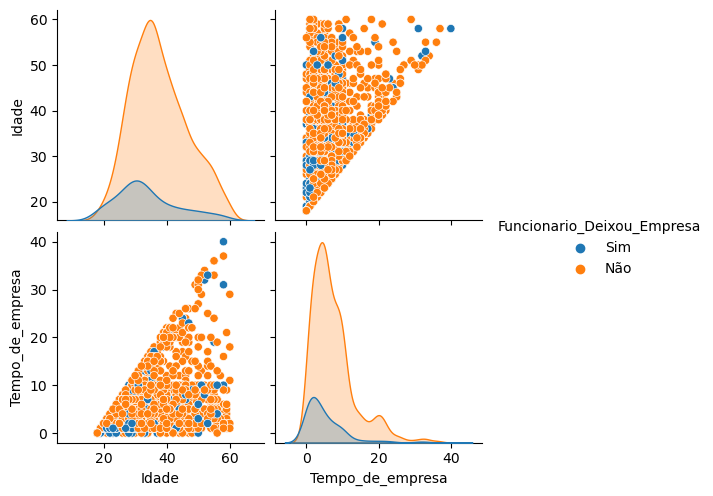

In [8]:
sns.pairplot(df, hue = 'Funcionario_Deixou_Empresa');

Funcionarios com **pouca idade** e **pouco tempo de empresa** tendem a deixar mais o emprego

## 3.2 Information Value

In [9]:
df['Target'] = np.where(df['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0);

df_iv = aed.analise_iv(df, 'Target');

df_iv.get_lista_iv()

C:\Users\Ben-Hur\Documents\preditiva analytics\avore de decisão\2_Arvores_Decisao_Turnover_Resolvido\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [10]:
df_iv.get_bivariada()

==> "Funcionario_Deixou_Empresa" tem IV de 9.21


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Funcionario_Deixou_Empresa,Não,0.0,1233.0,1233.0,83.88,0.0,100.00,0.0,0.01,-4.61,0.00
1,Funcionario_Deixou_Empresa,Sim,237.0,0.0,237.0,16.12,100.0,0.01,100.0,10000.00,9.21,9.21


==> "Faz_hora_extras" tem IV de 0.4


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras,Não,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Faz_hora_extras,Sim,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


==> "Tempo_de_empresa" tem IV de 0.34


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_de_empresa,"(-0.01, 1.0]",75.0,140.0,215.0,14.63,31.65,11.35,34.88,2.79,1.03,0.21
1,Tempo_de_empresa,"(1.0, 2.0]",27.0,100.0,127.0,8.64,11.39,8.11,21.26,1.40,0.34,0.01
2,Tempo_de_empresa,"(2.0, 3.0]",20.0,108.0,128.0,8.71,8.44,8.76,15.62,0.96,-0.04,0.00
3,Tempo_de_empresa,"(3.0, 5.0]",40.0,266.0,306.0,20.82,16.88,21.57,13.07,0.78,-0.25,0.01
4,Tempo_de_empresa,"(5.0, 7.0]",20.0,146.0,166.0,11.29,8.44,11.84,12.05,0.71,-0.34,0.01
5,Tempo_de_empresa,"(7.0, 9.0]",17.0,145.0,162.0,11.02,7.17,11.76,10.49,0.61,-0.49,0.02
6,Tempo_de_empresa,"(9.0, 10.0]",18.0,102.0,120.0,8.16,7.59,8.27,15.00,0.92,-0.08,0.00
7,Tempo_de_empresa,"(10.0, 15.0]",7.0,101.0,108.0,7.35,2.95,8.19,6.48,0.36,-1.02,0.05
8,Tempo_de_empresa,"(15.0, 40.0]",13.0,125.0,138.0,9.39,5.49,10.14,9.42,0.54,-0.62,0.03


==> "Idade" tem IV de 0.31


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Idade,"(17.99, 26.0]",56.0,106.0,162.0,11.02,23.63,8.60,34.57,2.75,1.01,0.15
1,Idade,"(26.0, 29.0]",35.0,129.0,164.0,11.16,14.77,10.46,21.34,1.41,0.34,0.01
2,Idade,"(29.0, 31.0]",27.0,102.0,129.0,8.78,11.39,8.27,20.93,1.38,0.32,0.01
3,Idade,"(31.0, 34.0]",32.0,164.0,196.0,13.33,13.50,13.30,16.33,1.02,0.02,0.00
4,Idade,"(34.0, 36.0]",16.0,131.0,147.0,10.00,6.75,10.62,10.88,0.64,-0.45,0.02
5,Idade,"(36.0, 38.0]",8.0,100.0,108.0,7.35,3.38,8.11,7.41,0.42,-0.87,0.04
6,Idade,"(38.0, 41.0]",17.0,122.0,139.0,9.46,7.17,9.89,12.23,0.72,-0.33,0.01
7,Idade,"(41.0, 45.0]",12.0,140.0,152.0,10.34,5.06,11.35,7.89,0.45,-0.80,0.05
8,Idade,"(45.0, 50.0]",16.0,114.0,130.0,8.84,6.75,9.25,12.31,0.73,-0.31,0.01
9,Idade,"(50.0, 60.0]",18.0,125.0,143.0,9.73,7.59,10.14,12.59,0.75,-0.29,0.01


==> "Estado_Civil" tem IV de 0.22


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Estado_Civil,Casado,84.0,589.0,673.0,45.78,35.44,47.77,12.48,0.74,-0.30,0.04
1,Estado_Civil,Divorciado,33.0,294.0,327.0,22.24,13.92,23.84,10.09,0.58,-0.54,0.05
2,Estado_Civil,Solteiro,120.0,350.0,470.0,31.97,50.63,28.39,25.53,1.78,0.58,0.13


==> "Freq_Viagens" tem IV de 0.13


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Freq_Viagens,Não viaja,12.0,138.0,150.0,10.20,5.06,11.19,8.00,0.45,-0.80,0.05
1,Freq_Viagens,Viaja frequentemente,69.0,208.0,277.0,18.84,29.11,16.87,24.91,1.73,0.55,0.07
2,Freq_Viagens,Viaja raramente,156.0,887.0,1043.0,70.95,65.82,71.94,14.96,0.91,-0.09,0.01


==> "Equilibrio_de_Vida" tem IV de 0.06


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Equilibrio_de_Vida,Bom,58.0,286.0,344.0,23.40,24.47,23.20,16.86,1.05,0.05,0.00
1,Equilibrio_de_Vida,Excelente,27.0,126.0,153.0,10.41,11.39,10.22,17.65,1.11,0.10,0.00
2,Equilibrio_de_Vida,Muito bom,127.0,766.0,893.0,60.75,53.59,62.12,14.22,0.86,-0.15,0.01
3,Equilibrio_de_Vida,Ruim,25.0,55.0,80.0,5.44,10.55,4.46,31.25,2.37,0.86,0.05


==> "Formacao" tem IV de 0.01


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Formacao,Doutorado,5.0,43.0,48.0,3.27,2.11,3.49,10.42,0.60,-0.51,0.01
1,Formacao,Ensino Médio,31.0,139.0,170.0,11.56,13.08,11.27,18.24,1.16,0.15,0.00
2,Formacao,Ensino Superior,99.0,473.0,572.0,38.91,41.77,38.36,17.31,1.09,0.09,0.00
3,Formacao,Ensino Técnico,44.0,238.0,282.0,19.18,18.57,19.30,15.60,0.96,-0.04,0.00
4,Formacao,Mestrado,58.0,340.0,398.0,27.07,24.47,27.58,14.57,0.89,-0.12,0.00


# 4. Modelo

In [11]:
df1 = pd.get_dummies(df)
df1

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,49,10,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,37,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,33,8,0,1,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,27,2,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,5,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1466,39,7,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1467,27,6,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1468,49,9,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [12]:
x = df1.drop(['Target', 'Funcionario_Deixou_Empresa_Não','Funcionario_Deixou_Empresa_Sim'], axis = 1)
y = df1['Target']

modelo = DecisionTreeClassifier(max_depth = 3, random_state=43)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=43)

## 4.1 Avaliação do modelo

Text(0.5, 1.0, 'Estimativa de Turnover\n Utilizando Árvores de Decisão')

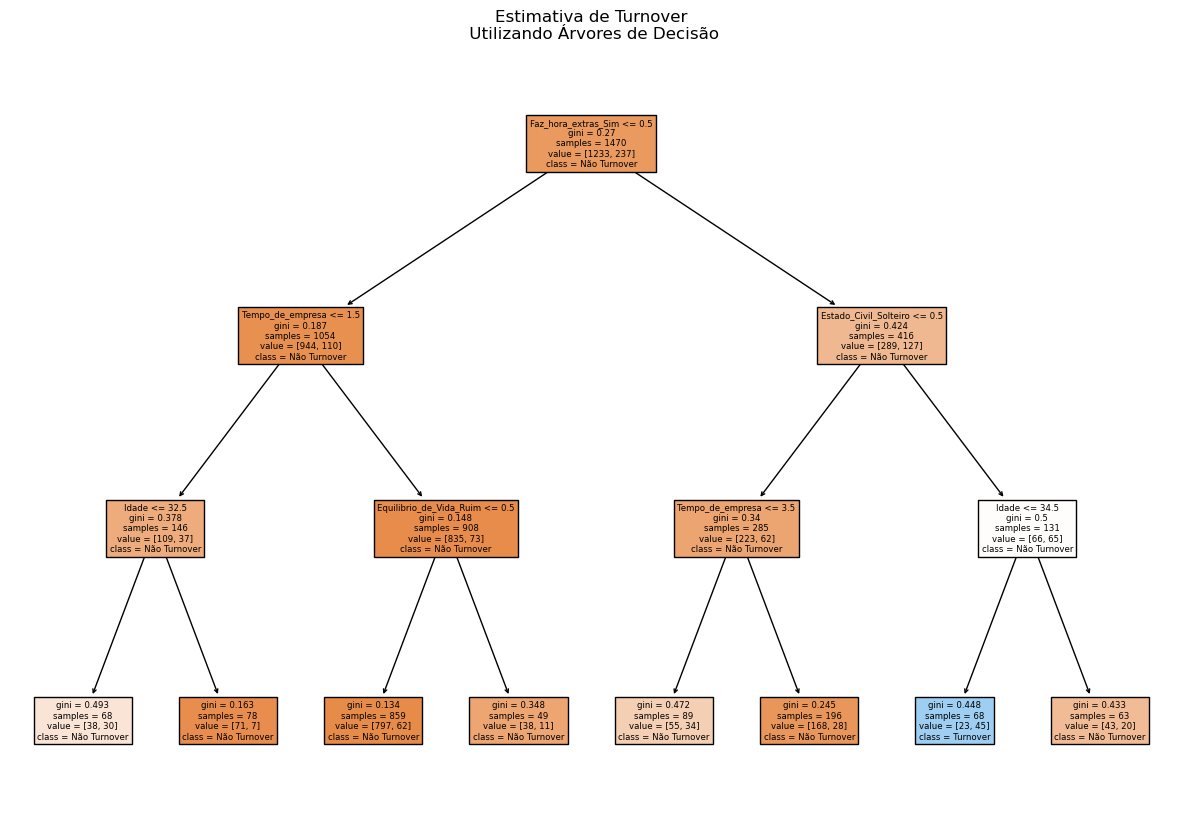

In [17]:
fig = plt.figure(figsize=(15,10))
features=list(x.columns)
tree.plot_tree(modelo,
              feature_names=features,
              class_names=['Não Turnover', 'Turnover'],
              filled=True);
plt.title('Estimativa de Turnover\n Utilizando Árvores de Decisão')

Pessoas **solteiras** e com menos que **35 anos de idade** tem maiores probabilidades de sairem da empresa

In [18]:
accuracy_score(y, modelo.predict(x)).round(2)

0.85

**Acuracia:** 85%